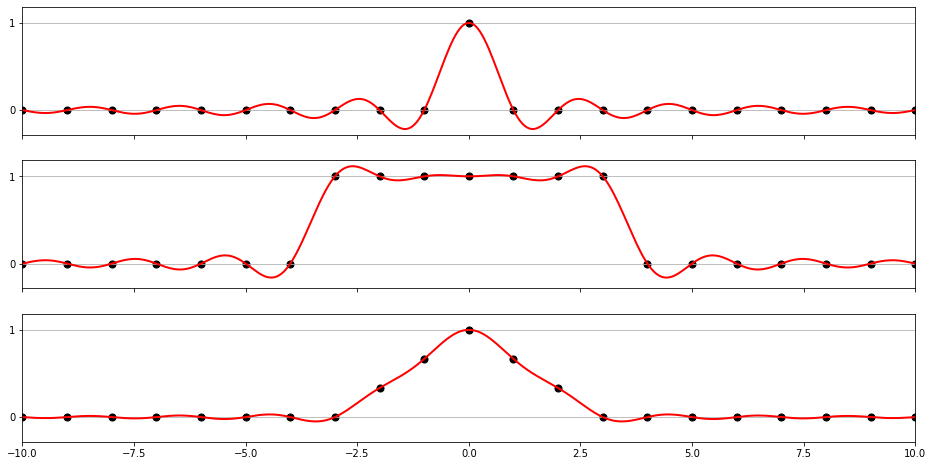

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h, xmax = np.power(1/2, range(0,7)), 10 # Set h, xmax / h is interval in each x(2^0,2^1,2^2,2^3,2^4)
error_sq, error_hat = [], []

fig, ax = plt.subplots(nrows=3,ncols=1,sharex=True,sharey=True,figsize=(16,8))

for z in range(len(h)):
  h0 = h[z]
  x = np.arange(-xmax,xmax +1,h0)
  xx = np.arange(-xmax-h0/20,xmax+h0/20 +h0/20,h0/20)

  def v(number): # Set Function : 1.Delta Func, 2.Square Func, 3.Hat Func
    if number == 1:
      v = (x == 0)
    elif number == 2:
      v = (abs(x) <= 3)
    elif number == 3:
      v = ((abs(x) <= 3) - abs(x)/3)
      v[v < 0] = 0
    else:
      print("Nothing")
    return v

  for i in range(0,3):
    p = np.zeros_like(xx)
 
    for j in range(1,len(x)):
      p = p + v(i+1)[j]*np.sin(np.pi*(xx-x[j])/h0) / (np.pi*(xx-x[j])/h0)

    if z == 0: # If h is 1(2^0), Plot graph
      ax[i].plot(xx,p,linewidth=2,color='red')
      ax[i].scatter(x,v(i+1),color='black',s=50)
      plt.yticks([0,1])
      ax[i].grid(axis='y')
    else:
      pass
  
  plt.xlim(-xmax,xmax)

  def vxx(number): # Set Function : 2.Square Func, 3.Hat Func / Same to v
    if number == 2:
      vxx = (abs(xx) <= 3)
    elif number == 3:
      vxx = ((abs(xx) <= 3) - abs(xx)/3)
      vxx[vxx < 0] = 0
    else:
      print("Nothing")
    return vxx

  error_2 = max(abs(p - vxx(2))) # Calculate error and Append to list
  error_3 = max(abs(p - vxx(3)))
  error_sq.append(error_2)
  error_hat.append(error_3)

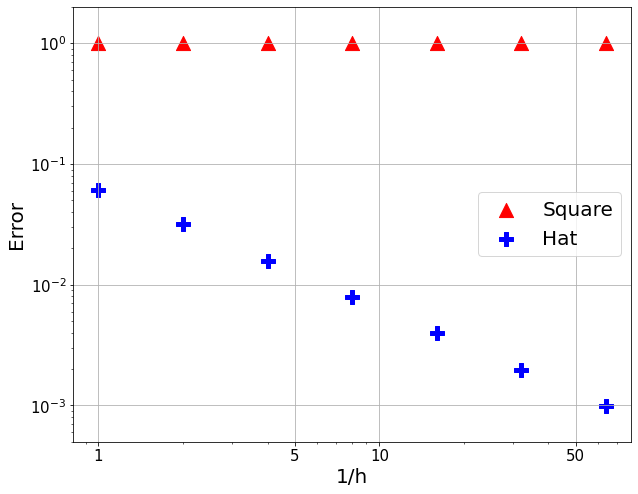

In [ ]:
plt.figure(figsize=(10,8)) # Plot error's graph
plt.scatter(1/h,error_sq,marker='^',s=200,color='red',label='Square')
plt.scatter(1/h,error_hat,marker='P',s=200,color='blue',label='Hat')
plt.ylim(5*10**(-4),2)
plt.yscale('log')
plt.xscale('log')
plt.xticks([1,5,10,50],map(str,[1,5,10,50]),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='right',fontsize=20)
plt.xlabel('1/h',fontsize=20)
plt.ylabel('Error',fontsize=20)
plt.grid()